In [2]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.preprocessing.sequence import pad_sequences


In [3]:
def extract_features(file_path):
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, sr=None)
    
    # Extract features
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio))  # Zero-crossing rate
    stft = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate))  # Chroma STFT
    mfcc = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate), axis=1)  # MFCCs
    rms = np.mean(librosa.feature.rms(y=audio))  # Root mean square energy
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate), axis=1)  # Mel spectrogram
    
    return np.hstack([zcr, stft, mfcc, rms, mel])


In [4]:
import os

# Define your 7 emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant_surprise', 'sad']

# Create a mapping for OAF and YAF folders
emotion_mapping = {
    'OAF_angry': 'angry', 'YAF_angry': 'angry',
    'OAF_disgust': 'disgust', 'YAF_disgust': 'disgust',
    'OAF_fear': 'fear', 'YAF_fear': 'fear',
    'OAF_happy': 'happy', 'YAF_happy': 'happy',
    'OAF_neutral': 'neutral', 'YAF_neutral': 'neutral',
    'OAF_Pleasant_surprise': 'pleasant_surprise', 'YAF_Pleasant_surprise': 'pleasant_surprise',
    'OAF_sad': 'sad', 'YAF_sad': 'sad'
}

# Set the path to the dataset
dataset_path = 'C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/'

# Load the audio files and their respective emotion labels
audio_files = []
labels = []

# Loop through the folders and map them to emotion labels
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        # Map the folder to the correct emotion
        emotion = emotion_mapping[folder]
        
        # Add files from each folder and assign the corresponding emotion label
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):
                audio_files.append(os.path.join(folder_path, file))
                labels.append(emotion)


In [8]:
def load_data(dataset_path):
    features, labels = [], []
    for emotion_folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, emotion_folder)
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                file_path = os.path.join(folder_path, file)
                label = emotion_folder
                feature_vector = extract_features(file_path)
                features.append(feature_vector)
                labels.append(label)
    
    return np.array(features), np.array(labels)

dataset_path = 'C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/'  # Update this path
X, y = load_data(dataset_path)

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


Checking folder: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_angry
Found audio file for angry: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_angry\OAF_back_angry.wav


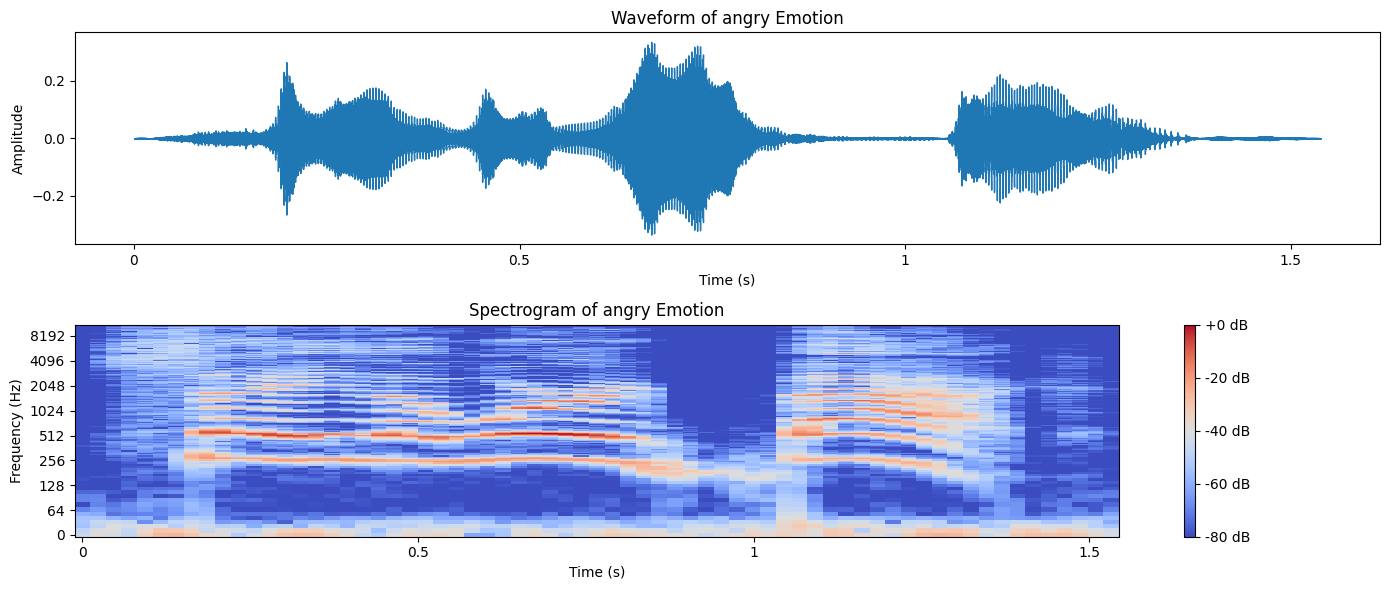

Checking folder: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_disgust
Found audio file for disgust: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_disgust\OAF_back_disgust.wav


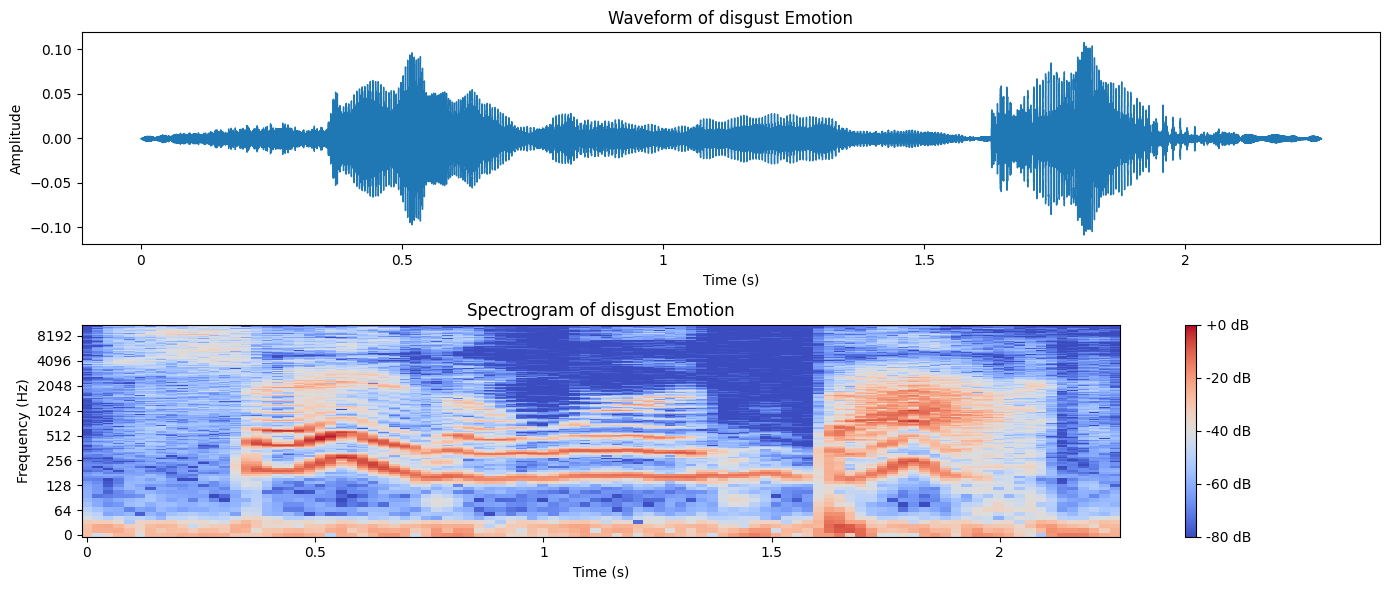

Checking folder: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_Fear
Found audio file for fear: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_Fear\OAF_back_fear.wav


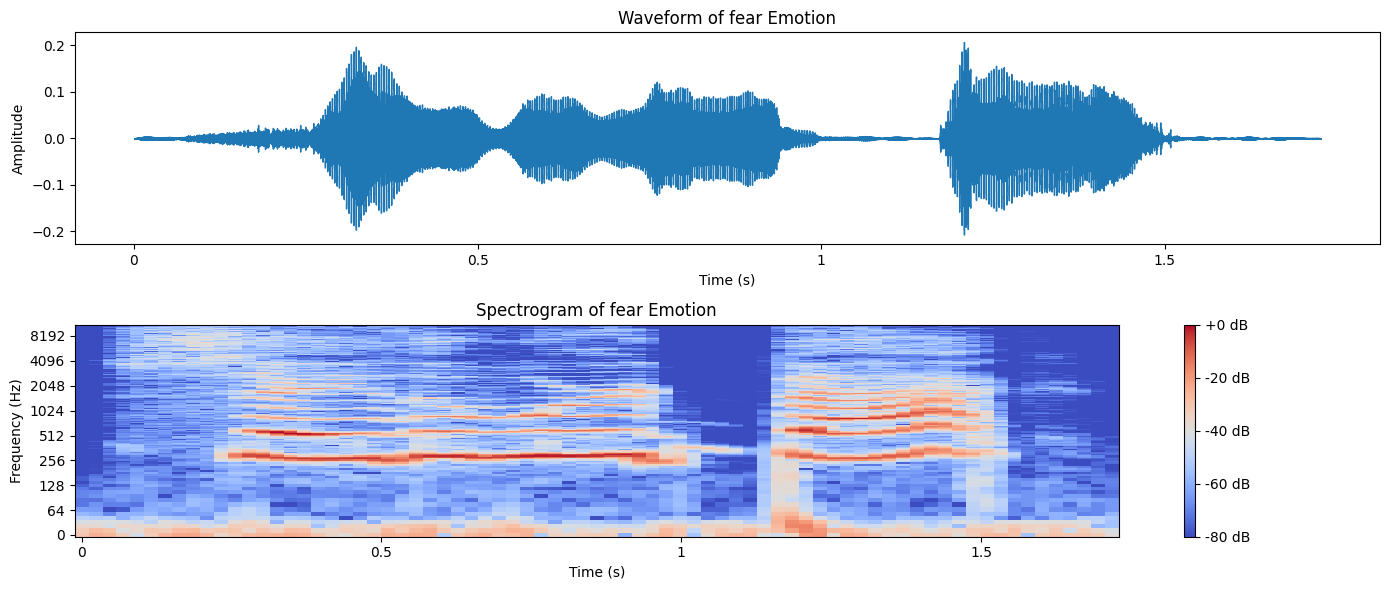

Checking folder: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_happy
Found audio file for happy: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_happy\OAF_back_happy.wav


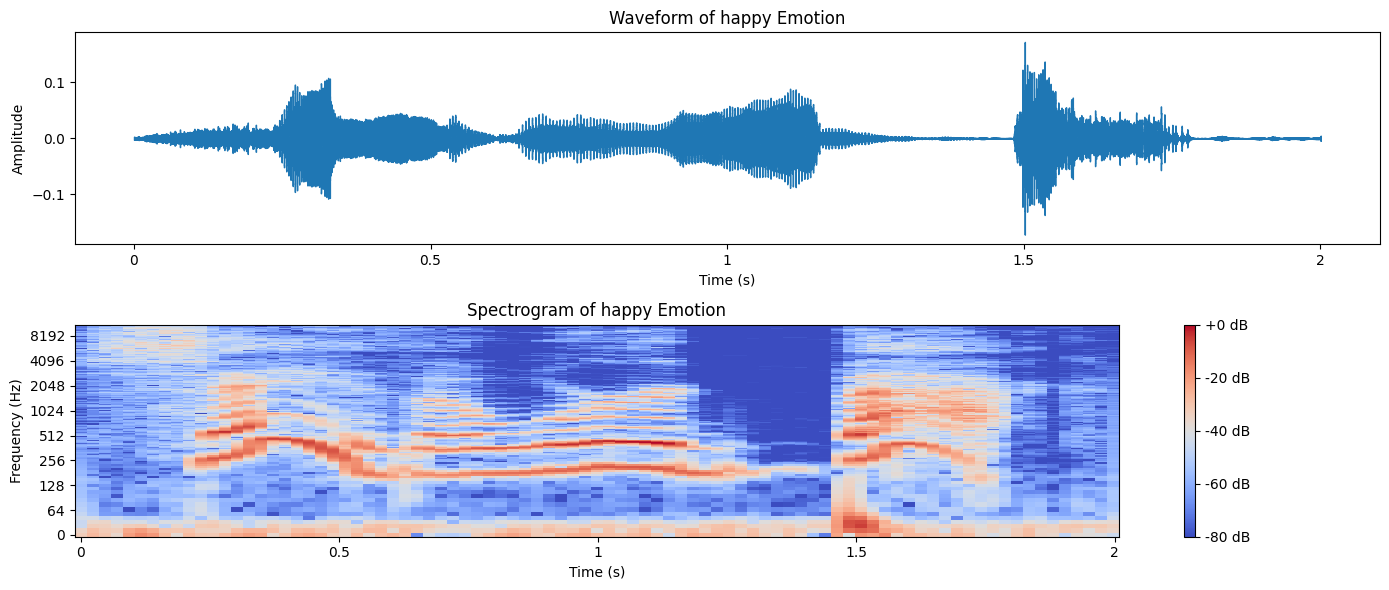

Checking folder: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_neutral
Found audio file for neutral: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_neutral\OAF_back_neutral.wav


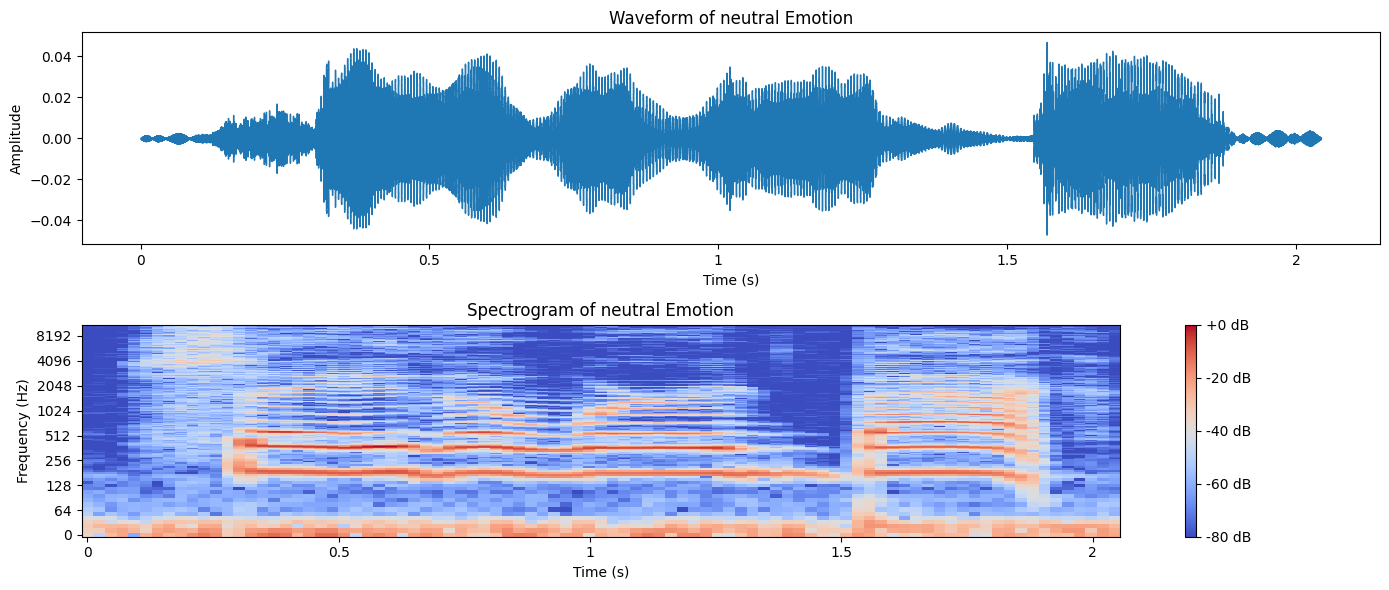

Checking folder: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_Pleasant_surprise
Found audio file for pleasant_surprise: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_Pleasant_surprise\OAF_back_ps.wav


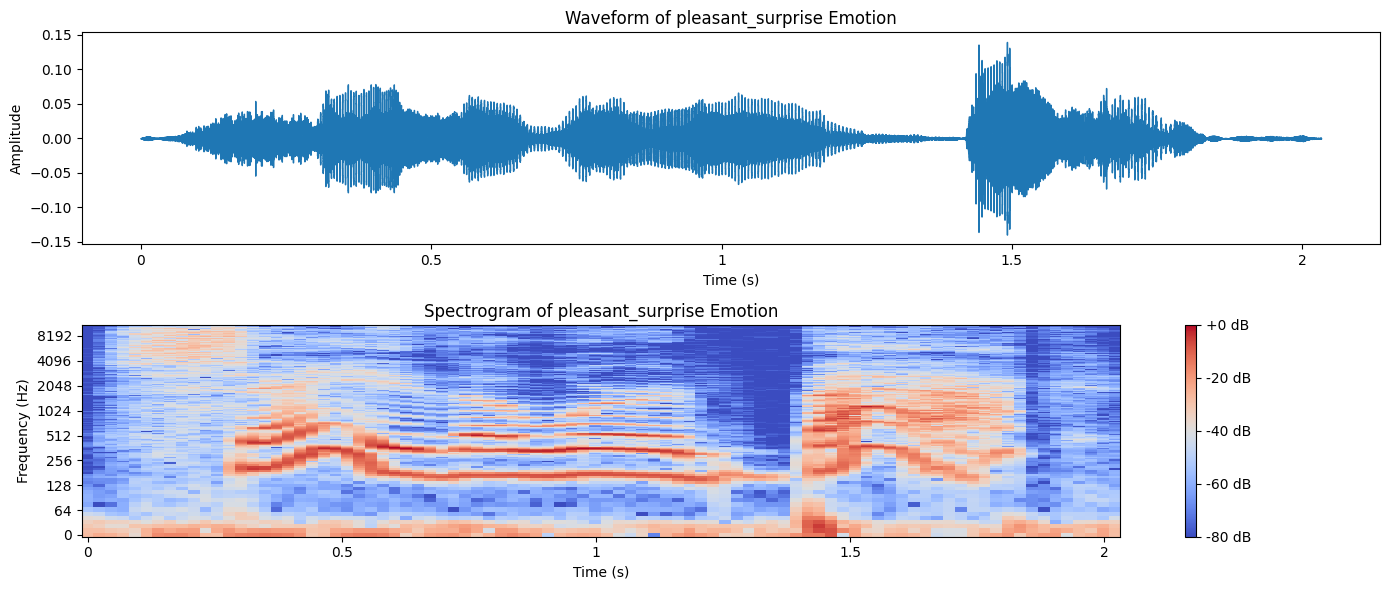

Checking folder: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_sad
Found audio file for sad: C:/Users/balad/OneDrive/Desktop/dl lab/TESSS Toronto emotional speech set data/OAF_sad\OAF_back_sad.wav


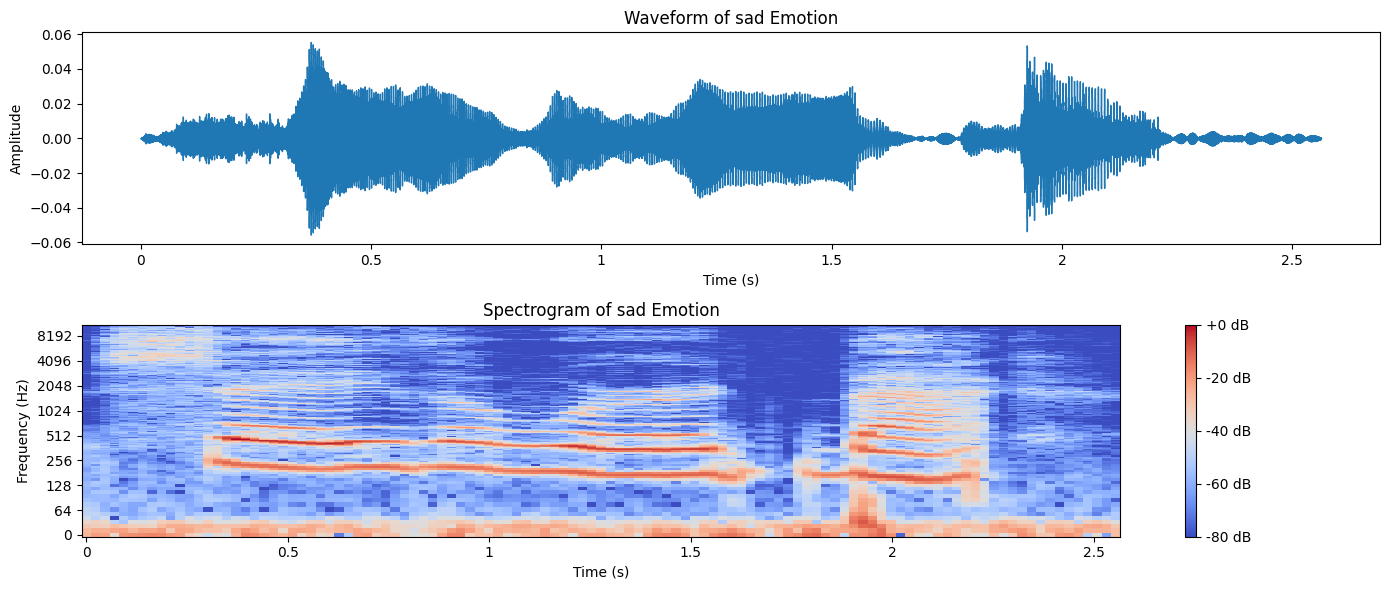

In [34]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the TESS folder
  # <-- Change this to your path

# Define the emotion categories and corresponding folders
emotion_folders = {
    'angry': ['OAF_angry', 'YAF_angry'],
    'disgust': ['OAF_disgust', 'YAF_disgust'],
    'fear': ['OAF_Fear', 'YAF_Fear'],
    'happy': ['OAF_happy', 'YAF_happy'],
    'neutral': ['OAF_neutral', 'YAF_neutral'],
    'pleasant_surprise': ['OAF_Pleasant_surprise', 'YAF_Pleasant_surprise'],
    'sad': ['OAF_sad', 'YAF_sad']
}

# Create a function to plot waveforms and spectrograms
def plot_waveform_and_spectrogram(emotion, audio_file):
    y, sr = librosa.load(audio_file)
    plt.figure(figsize=(14, 6))

    # Plot waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()

# Loop through each emotion and plot the waveform and spectrogram
for emotion, folders in emotion_folders.items():
    audio_file = None
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            print(f"Checking folder: {folder_path}")  # Debug line
            # Assuming only one audio file per folder
            audio_files = [file for file in os.listdir(folder_path) if file.endswith(('.wav', '.mp3'))]
            if audio_files:
                audio_file = os.path.join(folder_path, audio_files[0])  # Get the first file found
                break
    if audio_file:
        print(f"Found audio file for {emotion}: {audio_file}")  # Confirm audio file found
        plot_waveform_and_spectrogram(emotion, audio_file)
    else:
        print(f"No audio file found for {emotion} emotion.")


In [10]:
# DATA AUGMENTATION

# NOISE
def noise(data):
    noise_amp = 0.1 * np.random.uniform() * np.amax(data)  # Increase noise amplitude
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-10, high=10) * 1000)  # Increase shift range
    return np.roll(data, shift_range)

# PITCH
def pitch(data, sampling_rate, pitch_factor=0.5):  # Decrease pitch factor
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [35]:
def build_base_cnn(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(14, activation='softmax')  
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [16]:
# Reshape input for CNN (3D tensor)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN model
cnn_model = build_base_cnn((X_train_cnn.shape[1], 1))
cnn_history = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=50, batch_size=32)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0645 - loss: 43.5960 - val_accuracy: 0.2018 - val_loss: 2.4970
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1294 - loss: 12.6843 - val_accuracy: 0.1768 - val_loss: 2.4533
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1455 - loss: 7.0982 - val_accuracy: 0.2286 - val_loss: 2.4714
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1539 - loss: 4.6631 - val_accuracy: 0.2500 - val_loss: 2.4983
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1638 - loss: 3.4005 - val_accuracy: 0.2018 - val_loss: 2.5049
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1703 - loss: 2.8091 - val_accuracy: 0.2000 - val_loss: 2.4749
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1777 - loss: 2.5986 - val_accuracy: 0.2429 - val_loss: 2.4394
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1987 - loss: 2.4612 - val_accuracy: 0.2393 - val_lo

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense

def build_cnn_lstm(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        LSTM(64),  # LSTM layer
        Dense(64, activation='relu'),
        Dense(14, activation='softmax')  # 14 emotions
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [29]:
# Adjust the input shape for Conv1D + LSTM
cnn_lstm_model = build_cnn_lstm((X_train.shape[1], 1))

# Train CNN+LSTM model
history_cnn_lstm = cnn_lstm_model.fit(
    X_train.reshape(-1, X_train.shape[1], 1),  # Reshape input for training
    y_train, 
    validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test),  # Reshape validation input
    epochs=50, 
    batch_size=32
)


Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1430 - loss: 2.5039 - val_accuracy: 0.1911 - val_loss: 2.1058
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2912 - loss: 1.7426 - val_accuracy: 0.2446 - val_loss: 1.7722
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3162 - loss: 1.5779 - val_accuracy: 0.2786 - val_loss: 1.5649
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3651 - loss: 1.5137 - val_accuracy: 0.2929 - val_loss: 1.6766
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3860 - loss: 1.4901 - val_accuracy: 0.3304 - val_loss: 1.6527
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4434 - loss: 1.3951 - val_accuracy: 0.4696 - val_loss: 1.3558
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5070 - loss: 1.2964 - val_accuracy: 0.4357 - val_loss: 1.3733
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4942 - loss: 1.2777 - val_accuracy: 0.5000 - val_loss: 1.

Evaluating CNN Model:
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                       precision    recall  f1-score   support

OAF_Pleasant_surprise       0.50      0.38      0.43        47
            OAF_angry       1.00      0.95      0.97        37
          OAF_disgust       0.68      0.54      0.60        39
             OAF_fear       0.97      0.71      0.82        52
            OAF_happy       0.56      0.89      0.69        37
          OAF_neutral       0.69      0.90      0.78        30
              OAF_sad       0.92      0.67      0.78        49
YAF_Pleasant_surprise       0.85      1.00      0.92        40
            YAF_angry       0.97      0.92      0.94        37
          YAF_disgust       0.48      0.92      0.63        39
             YAF_fear       0.93      0.76      0.84        37
            YAF_happy       1.00      0.90      0.95        40
          YAF_neutral       1.00      0.72      0.84        43
              YAF_sad       0.91      0.88      0.89   

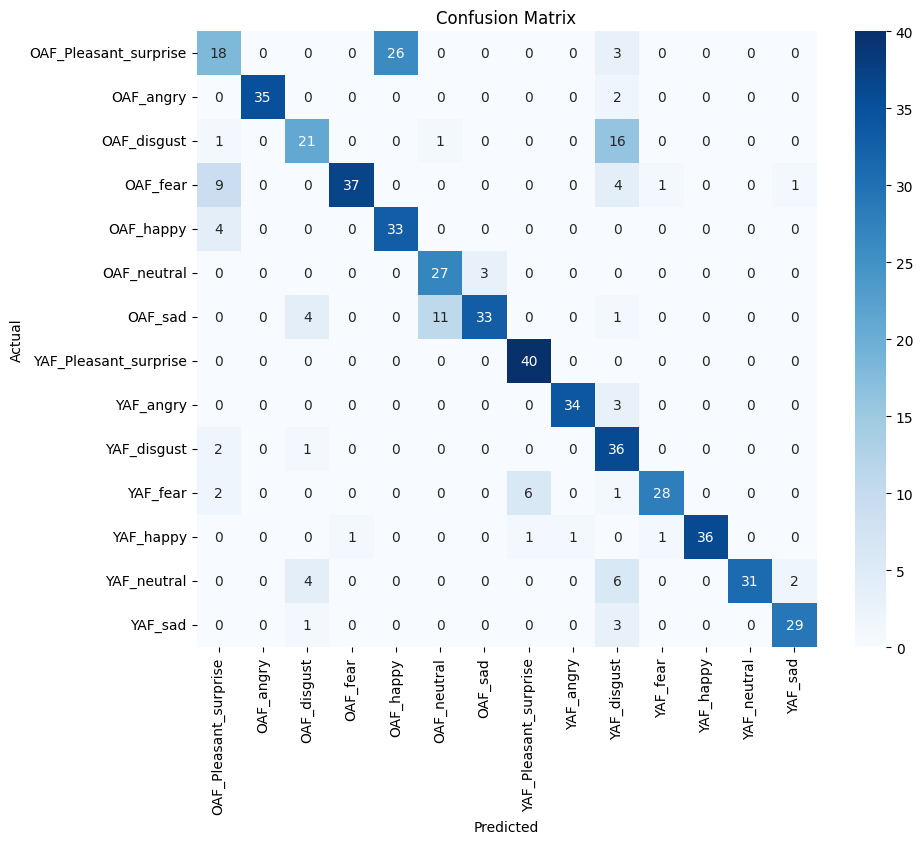

Evaluating CNN + LSTM Model:
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
                       precision    recall  f1-score   support

OAF_Pleasant_surprise       0.85      0.83      0.84        47
            OAF_angry       1.00      0.97      0.99        37
          OAF_disgust       0.86      0.97      0.92        39
             OAF_fear       0.98      0.96      0.97        52
            OAF_happy       0.94      0.84      0.89        37
          OAF_neutral       1.00      1.00      1.00        30
              OAF_sad       1.00      0.94      0.97        49
YAF_Pleasant_surprise       0.91      0.97      0.94        40
            YAF_angry       0.80      0.97      0.88        37
          YAF_disgust       0.88      0.95      0.91        39
             YAF_fear       0.97      0.81      0.88        37
            YAF_happy       0.86      0.80      0.83        40
          YAF_neutral       0.98      0.98      0.98        43
              YAF_sad       1.00      1.00      

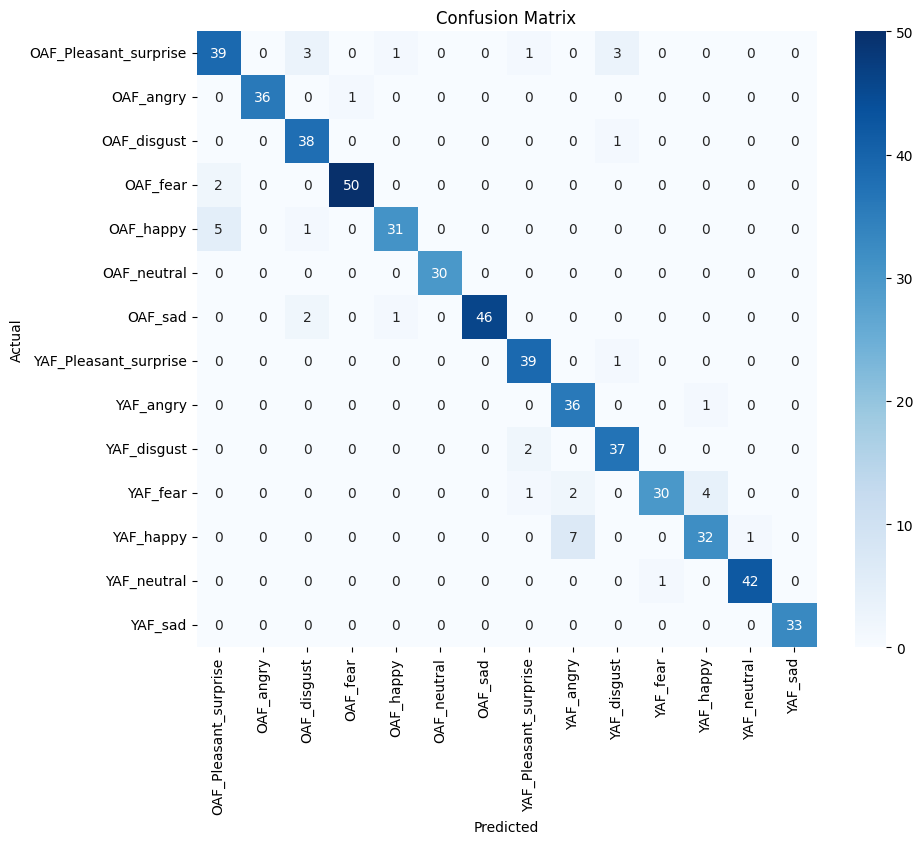

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, le):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Classification report
    print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Make sure label encoder (le) is already fitted to your labels
# Assume le is your LabelEncoder or OneHotEncoder used to encode the target classes

# Evaluate CNN model
print("Evaluating CNN Model:")
evaluate_model(cnn_model, X_test_cnn, y_test, le)

# Evaluate CNN + LSTM model
print("Evaluating CNN + LSTM Model:")
evaluate_model(cnn_lstm_model, X_test_cnn, y_test, le)


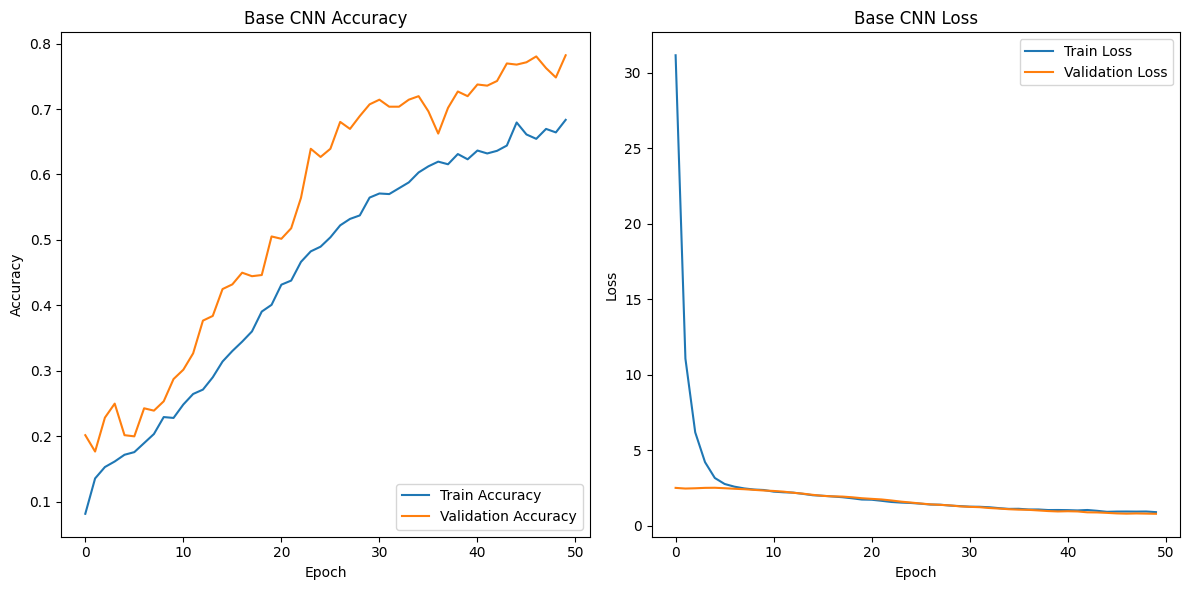

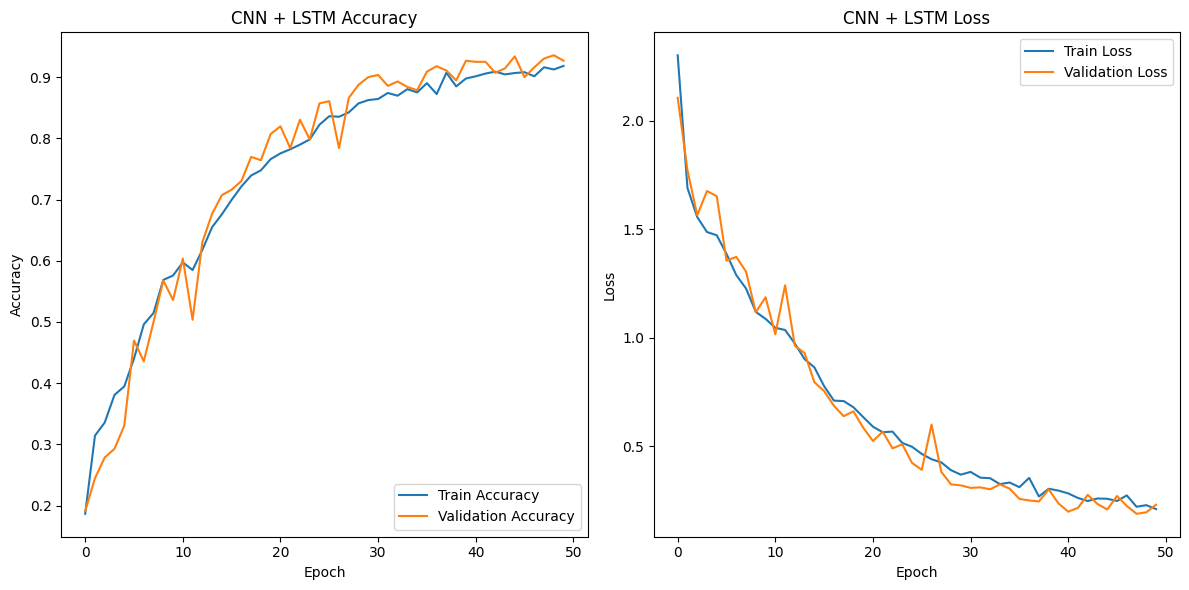

In [33]:
# Plotting function
def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    
    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Plot for Base CNN Model
plot_training_history(cnn_history, 'Base CNN')

# Plot for CNN + LSTM Model
plot_training_history(history_cnn_lstm, 'CNN + LSTM')
